In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplotlib config
%matplotlib inline

# SVG-Anzeige anschalten
%config InlineBackend.figure_formats = ['svg']

# Größe definieren
%config InlineBackend.rc = {'figure.figsize': (5.0, 4.0)}

df = pd.read_csv("../../00 Datasets/khm_without_useless_data.csv", sep = ';')

In [2]:
df.drop(columns=['user_win_rate_bucket','Unnamed: 0','expansion','event_type'], inplace = True)
df.head()

,draft_id,rank,on_play,num_mulligans,opp_num_mulligans,opp_colors,num_turns,won,deck_Absorb Identity,"deck_Aegar, the Freezing Flame",...,"deck_Vorinclex, Monstrous Raider",deck_Waking the Trolls,deck_Warchanter Skald,deck_Warhorn Blast,deck_Weathered Runestone,deck_Weigh Down,deck_Wings of the Cosmos,deck_Withercrown,deck_Woodland Chasm,deck_Youthful Valkyrie
0,2e0eef1fee1e4fb88d76e6a2fcd0a87e,Gold-2-0-0-0,True,0,0,UB,9,False,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2e0eef1fee1e4fb88d76e6a2fcd0a87e,Gold-2-0-0-0,True,0,1,UBRG,9,True,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2e0eef1fee1e4fb88d76e6a2fcd0a87e,Gold-2-0-0-2,True,1,0,BG,6,False,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2e0eef1fee1e4fb88d76e6a2fcd0a87e,Gold-2-0-0-1,True,0,1,UBG,14,False,0,1,...,0,0,0,0,0,0,0,0,0,0
4,00b43dc90ea5429b810e665f08568865,Gold-3-0-0-0,False,0,0,UG,11,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Winrate und Winpercentage nach Mulligan
mulligans = df.groupby(["num_mulligans"]).mean()[["num_turns","won"]]
mulligans.head(40)

,num_turns,won
num_mulligans,,
0,9.667441,0.561628
1,9.594669,0.424764
2,9.232202,0.270537
3,7.333333,0.090909
4,6.333333,0.000000
5,3.000000,0.000000


In [10]:
df["won"].mean()

0.5455748728203321

In [4]:
df_grouped = df.groupby("num_mulligans").agg(avgWinrate = ("won", np.mean)).reset_index()

df_grouped

,num_mulligans,avgWinrate
0,0,0.561628
1,1,0.424764
2,2,0.270537
3,3,0.090909
4,4,0.000000
5,5,0.000000


In [5]:
new_df_grouped = df.groupby("num_mulligans").mean()["won"]
new_df_grouped

num_mulligans
0    0.561628
1    0.424764
2    0.270537
3    0.090909
4    0.000000
5    0.000000
Name: won, dtype: float64

<AxesSubplot:xlabel='num_mulligans', ylabel='won'>

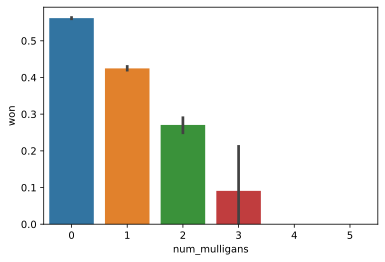

In [6]:
sns.barplot(x = df["num_mulligans"],
            y = df["won"])

In [7]:
#
df[["won", "num_turns"]].mean()

won          0.545575
num_turns    9.657361
dtype: float64

In [8]:
#Welche Decks am häufigsten gespielt werden
df["opp_colors"].value_counts(normalize = True)

WR       0.092604
BG       0.081088
UR       0.075415
BR       0.071579
WB       0.064680
WG       0.062520
UG       0.060292
RG       0.058762
UBG      0.052415
URG      0.045188
WU       0.040564
UB       0.030945
BRG      0.027185
WBG      0.023341
WUBRG    0.021532
UBRG     0.020884
WUG      0.020559
W        0.015856
WRG      0.015752
R        0.014802
WUB      0.014769
UBR      0.013696
G        0.013668
WBR      0.012125
WUBG     0.010053
B        0.008877
WUR      0.008702
U        0.008643
WURG     0.007474
WBRG     0.004690
WUBR     0.001340
Name: opp_colors, dtype: float64

In [17]:
df_grouped_2 = df.groupby("deck_Aegar, the Freezing Flame").agg(avgWinrate = ("won", np.mean)).reset_index()

df_grouped_2["Winrate improvement vs. Average"] = (df_grouped_2["avgWinrate"] - 0.54557487282033)

In [18]:
df_grouped_2

,"deck_Aegar, the Freezing Flame",avgWinrate,Winrate improvement vs. Average
0,0,0.544182,-0.001393
1,1,0.555294,0.009719
2,2,0.566757,0.021183
3,3,0.591039,0.045464
4,4,0.608696,0.063121
5,5,0.000000,-0.545575


<AxesSubplot:xlabel='deck_Aegar, the Freezing Flame', ylabel='avgWinrate'>

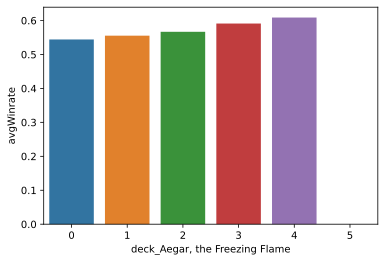

In [19]:
sns.barplot(x = df_grouped_2["deck_Aegar, the Freezing Flame"],
            y = df_grouped_2["avgWinrate"])

In [28]:
df[df["deck_Aegar, the Freezing Flame"] == 0]["rank"]

4           Gold-3-0-0-0
5           Gold-3-0-0-0
6           Gold-3-0-0-2
7           Gold-3-0-0-4
8           Gold-2-0-0-1
               ...      
386063    Bronze-2-0-0-0
386064    Bronze-2-0-0-2
386065    Bronze-1-0-0-0
386066    Bronze-1-0-0-2
386067    Bronze-1-0-0-2
Name: rank, Length: 349172, dtype: object

In [34]:
df.groupby(by=["won"]).agg(tmp=("deck_Aegar, the Freezing Flame", np.mean))

,tmp
won,
False,0.117249
True,0.125101
